In [9]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import sys
import os

In [10]:
# Change path to homework3 where the ReadFile.py file is
module_path = r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework3'

# Add the directory to sys.path
sys.path.append(module_path)

# Import ReadFile
from ReadFile import Read

In [11]:
# Change path to homework4 where the class CenterOfMass file is
module_path = r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework4'

# Add the directory to sys.path
sys.path.append(module_path)

# Import CenterOfMass class
from CenterOfMass import CenterOfMass

In [12]:
# Function to calculate angular momentum
def angular_momentum(filename, ptype):
    """ Calculate the angle momentum of a specific particle type.
    Parameters
    ----------
    filename : `str`
        Filename of the text file containing the galaxy's particle data.
    ptype : `int`
        type of particle (halo, disk, or bulge) 
        
    Returns
    -------------
     L : `np.array` 
    Angular momentum vector (Lx, Ly, Lz) of the specified particle type relative to the galaxy's COM, computed as:

    L = sum(m_i * (r_i - r_COM) × (v_i - v_COM))

    where:
        - m_i is the mass of particle i
        - (r_i - r_COM) is the particle's position relative to the galaxy's COM
        - (v_i - v_COM) is the particle's velocity relative to the galaxy's COM
        - × is the vector cross product operation

    """

    # Create a COM object for MW galaxy
    COM = CenterOfMass(filename, ptype)
    
    # Get COM position and velocity
    com_pos = COM.COM_P(0.1)
    com_vel = COM.COM_V(com_pos[0], com_pos[1], com_pos[2])

    # Remove units from com_pos and com_vel
    com_pos = com_pos.to(u.kpc).value
    com_vel = com_vel.to(u.km/u.s).value

    # Read particle data
    time, total, data = Read(filename)
    
    # Select particle type
    index = np.where(data['type'] == ptype)
    

    # Positions and velocities relative to COM
    pos_rel = np.array([data['x'][index] - com_pos[0],
                        data['y'][index] - com_pos[1],
                        data['z'][index] - com_pos[2]])
    vel_rel = np.array([data['vx'][index] - com_vel[0],
                        data['vy'][index] - com_vel[1],
                        data['vz'][index] - com_vel[2]])
    
    # Masses
    m = data['m'][index]

    # Calculate angular momentum L = sum(m * (r x v))
    # Initialize angular momentum vector
    L = np.zeros(3)

# Loop through each particle to explicitly calculate angular momentum
    for i in range(len(m)):
        r = pos_rel[:, i]      # Position vector of particle i relative to COM
        v = vel_rel[:, i]      # Velocity vector of particle i relative to COM
        L += m[i] * np.cross(r, v)  # Summation of individual particle's angular momentum

    return L

In [33]:
# Generate snapshots numbers and initialize stellar and halo arrays
snapshots = np.arange(0, 800, 50)
valid_times = [] # track only valid time
stellar_angles = []
halo_angles = []

In [14]:
# Initial angular momentum angle at the current-day snapshot (snapshot 0) for reference
L0_stellar = angular_momentum(r"C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework3\MW_000.txt", 2)
L0_halo = angular_momentum(r"C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework3\MW_000.txt", 1)

print(L0_halo, L0_stellar)

[ -7277.00324083   4475.83957801 -17650.45908794] [  -59.9934527    -34.25949609 -9459.35515219]


Snapshot: 0, Extracted Time: 0.0 Myr, Type: <class 'astropy.units.quantity.Quantity'>
Snapshot: 50, Extracted Time: 714.28571 Myr, Type: <class 'astropy.units.quantity.Quantity'>
File C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Research_Assignment\Research_Assignment_2\MW\MW_100.txt not found. Using C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Research_Assignment\Research_Assignment_2\MW\MW_101.txt instead.
Snapshot: 100, Extracted Time: 1442.85713 Myr, Type: <class 'astropy.units.quantity.Quantity'>
Snapshot: 150, Extracted Time: 2142.85714 Myr, Type: <class 'astropy.units.quantity.Quantity'>
Snapshot: 200, Extracted Time: 2857.14286 Myr, Type: <class 'astropy.units.quantity.Quantity'>
Snapshot: 250, Extracted Time: 3571.42855 Myr, Type: <class 'astropy.units.quantity.Quantity'>
File C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Research_Assignment\Research_Assignment_2\MW\MW_300.txt not found. Using C:\Users\kietb\OneDrive\Desktop\Suffe

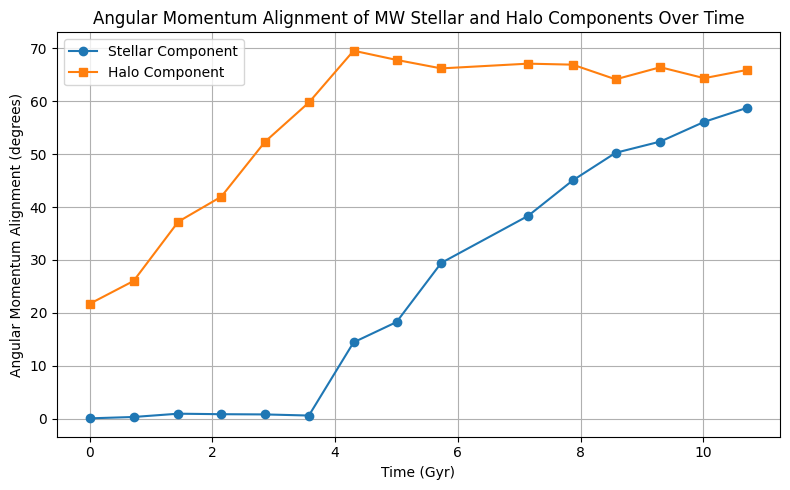

In [ ]:
# Switch path to the current place where snapshot is located
path = r"C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Research_Assignments\Research_Assignment_2\MW"

# Calculate angular momentum alignment over time
for snap in snapshots:
    fname = f"{path}\\MW_{snap:03}.txt"

    # Check if the file exists; if not, try using the next number (snap+1)
    if not os.path.exists(fname):
        alternative_fname = f"{path}\\MW_{snap+1:03}.txt"
        if os.path.exists(alternative_fname):
            print(f"File {fname} not found. Using {alternative_fname} instead.")
            fname = alternative_fname
        else:
            print(f"Warning: Both {fname} and {alternative_fname} are missing. Skipping snapshot {snap}.")
            continue  # Skip this snapshot if both are missing

        # Read time from snapshot file
        time, total, data = Read(fname) 
        
        # Print extracted time to check its type and value
        print(f"Snapshot: {snap}, Extracted Time: {time}, Type: {type(time)}")

         # Ensure time is converted properly to a unitless float in Gyr
        if isinstance(time, u.Quantity):  # If it has units, convert
            time_value = time.to(u.Gyr).value
        else:
            time_value = float(time)  # If it's already a number, keep it

        valid_times.append(time_value)  # Store the time for this snapshot


        # Angular momentum for stellar and halo
        L_stellar = angular_momentum(fname, 2)
        L_halo = angular_momentum(fname, 1)
        
        # Calculate angles relative to initial angular momentum vectors
        # np.dot: dot product between initial and current angular momentum vectors
        # np.linalg.norm: magnitude of angular momentum
        # angle = arccos(dot product / magnitude)
        angle_stellar = np.arccos(np.dot(L0_stellar, L_stellar) / (np.linalg.norm(L0_stellar) * np.linalg.norm(L_stellar)))    
        angle_halo = np.arccos(np.dot(L0_halo, L_halo) / (np.linalg.norm(L0_halo) * np.linalg.norm(L_halo)))

        # Convert angles to degrees and store
        stellar_angles.append(np.degrees(angle_stellar))
        halo_angles.append(np.degrees(angle_halo))

        # Debugging: Print final time values to check correct storage
        print("Final Time Values for Plotting:", valid_times)

# Plot angular momentum alignment with time on the x-axis
plt.figure(figsize=(8, 5))
plt.plot(valid_times, stellar_angles, 'o-', label='Stellar Component')
plt.plot(valid_times, halo_angles, 's-', label='Halo Component')
plt.xlabel('Time (Gyr)')  # Time in gigayears from snapshot metadata
plt.ylabel('Angular Momentum Alignment (degrees)')
plt.title('Angular Momentum Alignment of MW Stellar and Halo Components Over Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()